<a href="https://colab.research.google.com/github/tsholofelo-mokheleli/ACIS-2023-New-Zealand/blob/main/Final%20DR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Dimensionality Reduction in Machine Learning**

### **Import Libraries**

In [1]:
# Load the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
import numpy as np
import seaborn as sns

# Scaler
from sklearn.preprocessing import StandardScaler

# Dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Warning filter
import warnings
warnings.filterwarnings('ignore')
cmap=sns.color_palette('Blues_r')

# Metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, cohen_kappa_score, confusion_matrix, balanced_accuracy_score
from imblearn.metrics import geometric_mean_score

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

# Ensemble Method
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier


# Plot Theme
sns.set_style("darkgrid")
plt.style.use("seaborn-deep")

### **Load the data**

In [2]:
data = pd.read_csv("Diabetes health indicators Multi-Class.csv", sep=';', on_bad_lines='skip')

In [3]:
data.head()

,Patient,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,2,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,3,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,4,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,5,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [4]:
data.shape

(253680, 23)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Patient               253680 non-null  int64  
 1   Diabetes_012          253680 non-null  float64
 2   HighBP                253680 non-null  float64
 3   HighChol              253680 non-null  float64
 4   CholCheck             253680 non-null  float64
 5   BMI                   253680 non-null  float64
 6   Smoker                253680 non-null  float64
 7   Stroke                253680 non-null  float64
 8   HeartDiseaseorAttack  253680 non-null  float64
 9   PhysActivity          253680 non-null  float64
 10  Fruits                253680 non-null  float64
 11  Veggies               253680 non-null  float64
 12  HvyAlcoholConsump     253680 non-null  float64
 13  AnyHealthcare         253680 non-null  float64
 14  NoDocbcCost           253680 non-null  float64
 15  

**Drop null from target var, and Convert data to Float**

In [6]:
data = data.drop(["Patient"], axis=1)
data = data.dropna()
data.rename(columns={"Diabetes_012": "Diabetes"}, inplace=True)

# Convert all columns to int data type
for column in data.columns:
    data[column] = data[column].astype('float')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes              253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

### **Class Distribution**

**Explore the class distribution**

In [7]:
class_counts = data['Diabetes'].value_counts()
print(class_counts)

0.0    213703
2.0     35346
1.0      4631
Name: Diabetes, dtype: int64


**Visualize the class distribution**

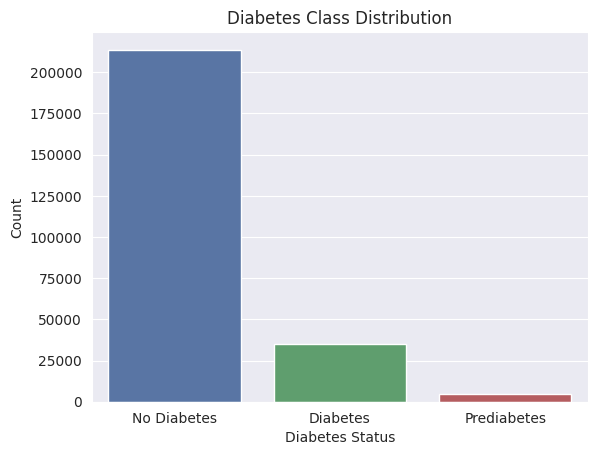

In [8]:
# Create a copy of the original dataset
new_data = data.copy()

mh_mapping = {0.0: 'No Diabetes', 1.0: 'Prediabetes', 2.0: 'Diabetes'}
new_data['dhi_label'] = new_data['Diabetes'].map(mh_mapping)

# Plot the distribution based on the new dataset
sns.countplot(data=new_data, x='dhi_label')
plt.xlabel('Diabetes Status')
plt.ylabel('Count')
plt.title('Diabetes Class Distribution')
plt.show()

### **Standardizing**

In [9]:
data_x = data.drop(["Diabetes"], axis=1)
data_y = data['Diabetes']

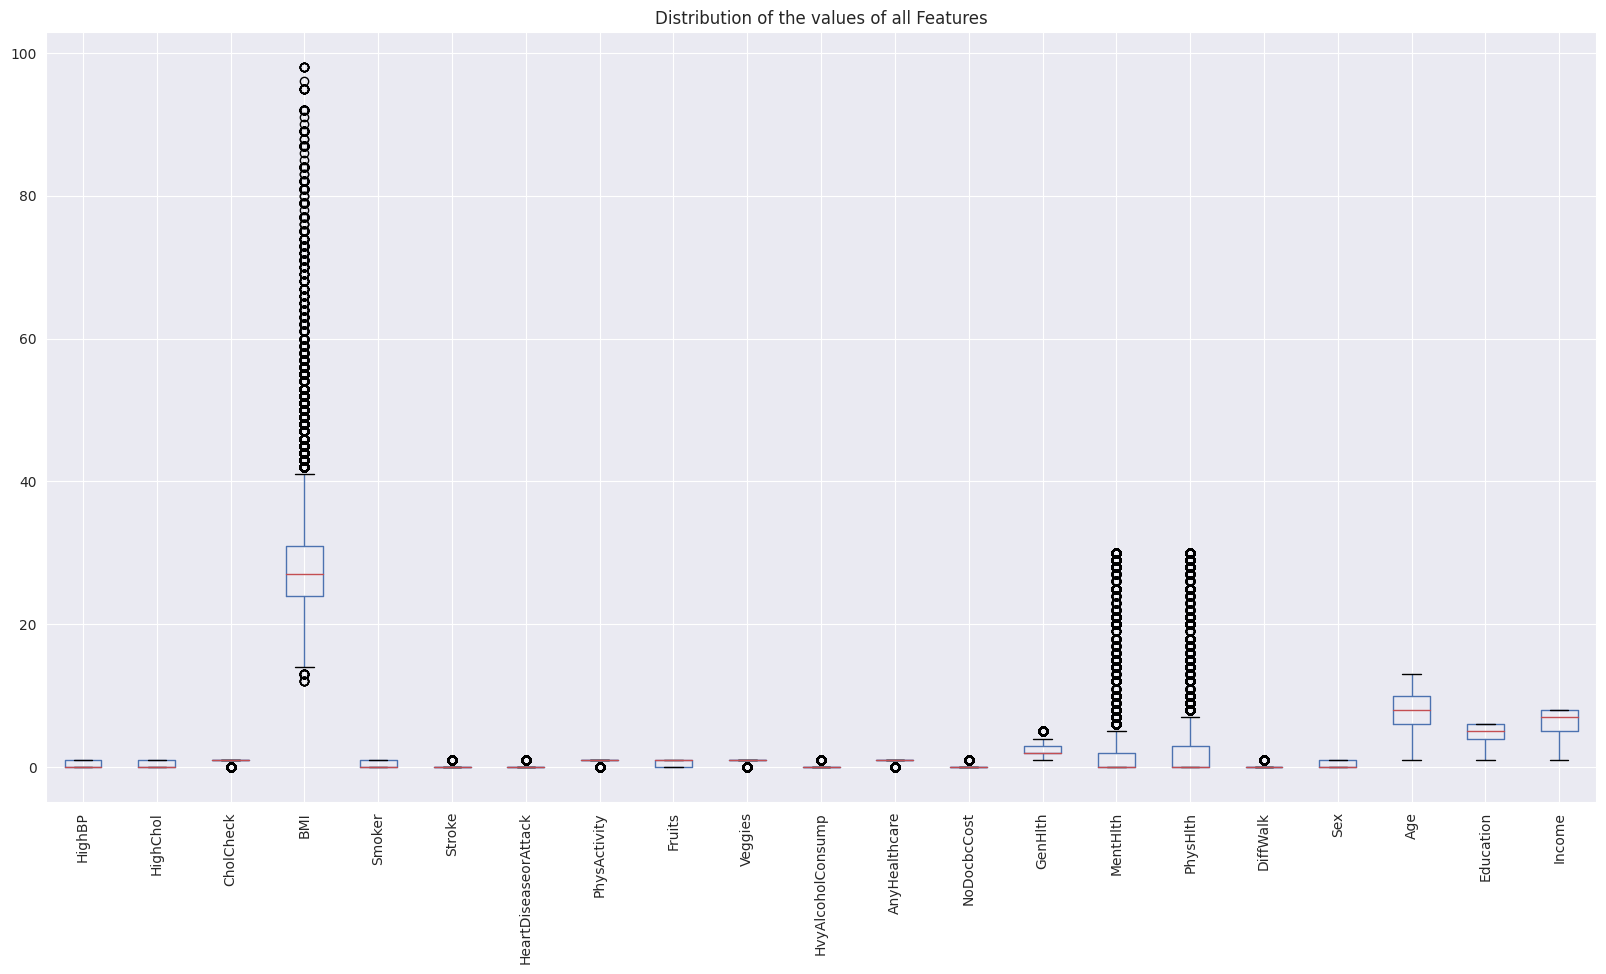

In [10]:
plt.figure(figsize=(20,10))
data_x.boxplot()
plt.xticks(rotation=90)
plt.title("Distribution of the values ​​of all Features")
plt.show()

**Standardize the feature columns**

In [11]:
scaler = StandardScaler()
standardized_features = scaler.fit_transform(data_x)

# Convert the standardized features back to a DataFrame
std_data = pd.DataFrame(standardized_features, columns=data_x.columns)

In [12]:
std_data.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.153688,1.165254,0.196922,1.757936,1.120927,-0.205637,-0.322458,-1.762814,-1.316872,0.482087,...,0.226863,-0.303173,2.329121,1.998592,1.233999,2.223615,-0.887021,0.316900,-1.065595,-1.474487
1,-0.866785,-0.858182,-5.078164,-0.511806,1.120927,-0.205637,-0.322458,0.567275,-1.316872,-2.074316,...,-4.407954,3.298445,0.457294,-0.429630,-0.486592,-0.449718,-0.887021,-0.337933,0.963272,-2.440138
2,1.153688,1.165254,0.196922,-0.057858,-0.892119,-0.205637,-0.322458,-1.762814,0.759375,-2.074316,...,0.226863,3.298445,2.329121,3.617407,2.954590,2.223615,-0.887021,0.316900,-1.065595,0.939638
3,1.153688,-0.858182,0.196922,-0.209174,-0.892119,-0.205637,-0.322458,0.567275,0.759375,0.482087,...,0.226863,-0.303173,-0.478619,-0.429630,-0.486592,-0.449718,-0.887021,0.971733,-2.080028,-0.026012
4,1.153688,1.165254,0.196922,-0.663122,-0.892119,-0.205637,-0.322458,0.567275,0.759375,0.482087,...,0.226863,-0.303173,-0.478619,-0.024926,-0.486592,-0.449718,-0.887021,0.971733,-0.051162,-0.991662


**Marge the data back**

In [13]:
# Concatenate the standardized features with the target column
std_df = pd.concat([std_data, data_y], axis=1)

In [14]:
std_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HighBP                253680 non-null  float64
 1   HighChol              253680 non-null  float64
 2   CholCheck             253680 non-null  float64
 3   BMI                   253680 non-null  float64
 4   Smoker                253680 non-null  float64
 5   Stroke                253680 non-null  float64
 6   HeartDiseaseorAttack  253680 non-null  float64
 7   PhysActivity          253680 non-null  float64
 8   Fruits                253680 non-null  float64
 9   Veggies               253680 non-null  float64
 10  HvyAlcoholConsump     253680 non-null  float64
 11  AnyHealthcare         253680 non-null  float64
 12  NoDocbcCost           253680 non-null  float64
 13  GenHlth               253680 non-null  float64
 14  MentHlth              253680 non-null  float64
 15  

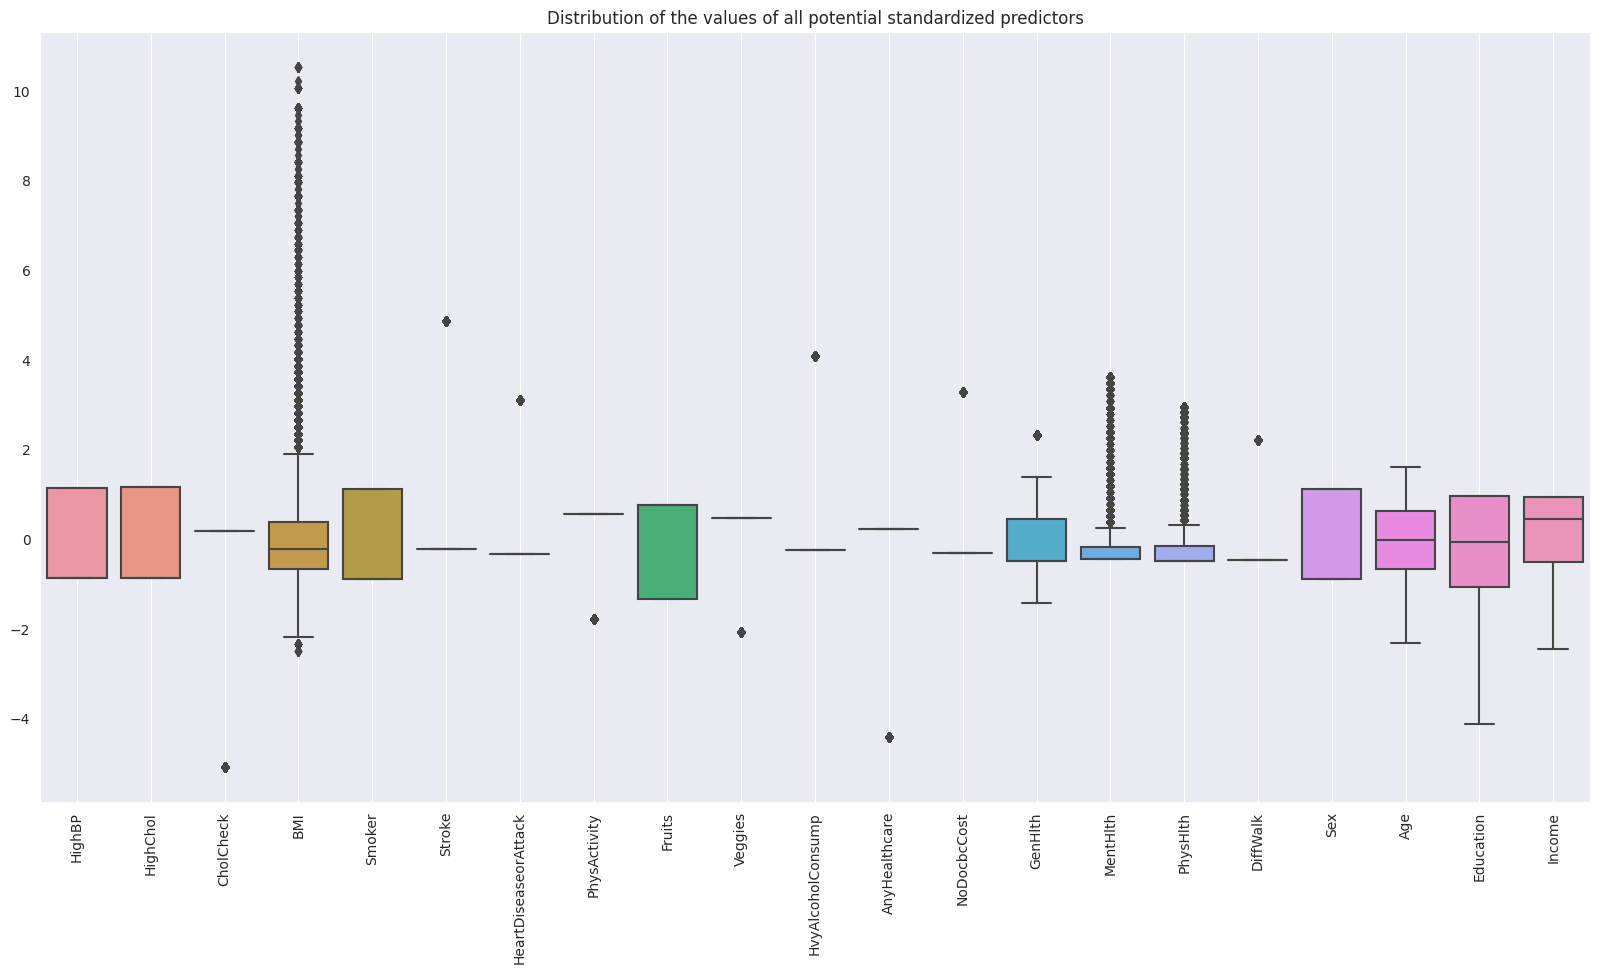

In [15]:
plt.figure(figsize=(20,10))
sea.boxplot(data=std_df.iloc[:,:-1]) # except the target
plt.xticks(rotation=90)
plt.title("Distribution of the values ​​of all potential standardized predictors")
plt.grid()
plt.show()

###**Correlation**

Text(0.5, 1.0, 'Correlation Heatmap')

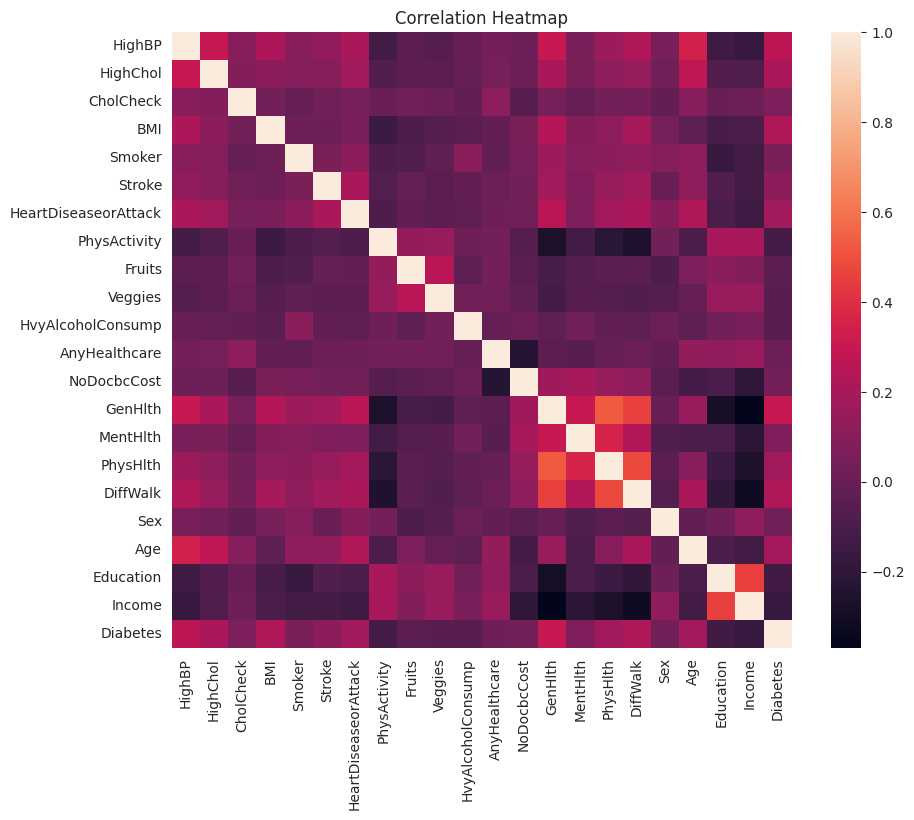

In [16]:
# Calculate the correlation matrix
correlation_matrix = std_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False).set_title('Correlation Heatmap')

### **Dimensionality Reduction**

**Split Dataset**

In [17]:
X = std_df.drop(["Diabetes"], axis=1)
y = std_df['Diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
print(X_train.shape)

(202944, 21)


In [19]:
print(X_test.shape)

(50736, 21)


### **Define Classifiers**

In [20]:
# Define a list of classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(),
}

classifiers_pca = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(),
}

classifiers_lda = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(),
}

### **Baseline model**

--- Logistic Regression ---
Accuracy: 0.85
Precision: 0.82
Recall: 0.85
F1 Score: 0.81
ROC AUC: 0.78
Balanced Accuracy: 0.39
Confusion Matrix:
[[41754     0  1041]
 [  871     0    73]
 [ 5714     0  1283]]




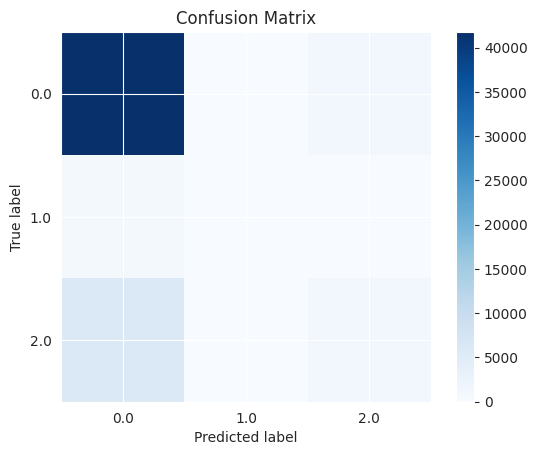

--- Random Forest ---
Accuracy: 0.84
Precision: 0.80
Recall: 0.84
F1 Score: 0.81
ROC AUC: 0.74
Balanced Accuracy: 0.39
Confusion Matrix:
[[41330    32  1433]
 [  843     0   101]
 [ 5574     5  1418]]




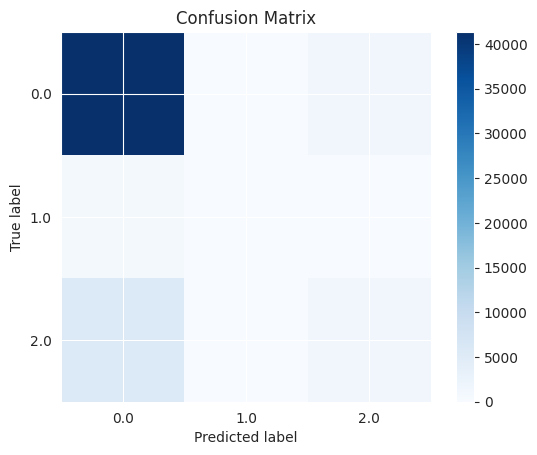

--- K-Nearest Neighbors ---
Accuracy: 0.83
Precision: 0.78
Recall: 0.83
F1 Score: 0.80
ROC AUC: 0.66
Balanced Accuracy: 0.39
Confusion Matrix:
[[40657    24  2114]
 [  814     1   129]
 [ 5516    14  1467]]




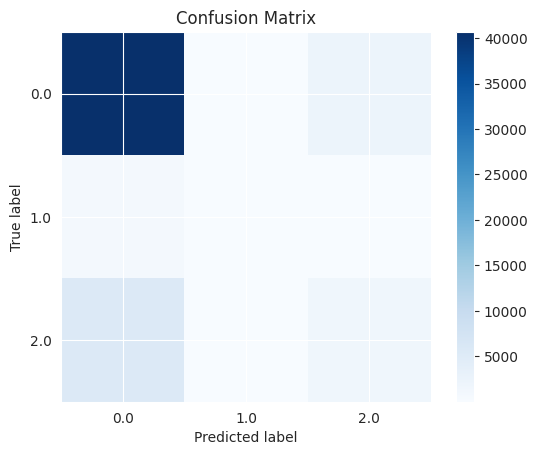

--- XGBoost ---
Accuracy: 0.85
Precision: 0.81
Recall: 0.85
F1 Score: 0.81
ROC AUC: 0.78
Balanced Accuracy: 0.39
Confusion Matrix:
[[41765     1  1029]
 [  848     0    96]
 [ 5612     0  1385]]




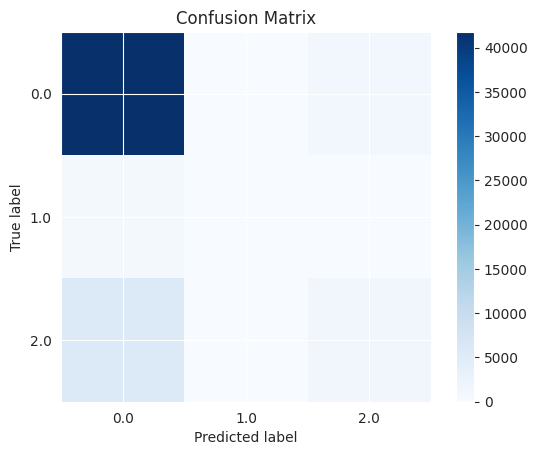

In [21]:
# Dictionary to store evaluation metrics
results = {}

# Loop through each classifier
for name, clf in classifiers.items():
    # Train the classifier
    clf.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = clf.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted", zero_division=1)
    recall = recall_score(y_test, y_pred, average="weighted", zero_division=1)
    f1 = f1_score(y_test, y_pred, average="weighted", zero_division=1)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)

    # ROC AUC calculation for binary and multiclass classification
    if len(np.unique(y_train)) == 2:
        roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
    else:
        roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test), multi_class='ovr')

    # Store the results in the dictionary
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC AUC": roc_auc,
        "Balanced Accuracy": balanced_accuracy,
        "Confusion Matrix": confusion,
    }

# Display the results
for name, metrics in results.items():
    print(f"--- {name} ---")
    print("Accuracy: {:.2f}".format(metrics["Accuracy"]))
    print("Precision: {:.2f}".format(metrics["Precision"]))
    print("Recall: {:.2f}".format(metrics["Recall"]))
    print("F1 Score: {:.2f}".format(metrics["F1 Score"]))
    print("ROC AUC: {:.2f}".format(metrics["ROC AUC"]))
    print("Balanced Accuracy: {:.2f}".format(metrics["Balanced Accuracy"]))
    print("Confusion Matrix:")
    print(metrics["Confusion Matrix"])
    print("\n")

    # Plot Confusion Matrix
    cm = metrics["Confusion Matrix"]
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]), yticks=np.arange(cm.shape[0]),
          xticklabels=np.unique(y_test), yticklabels=np.unique(y_test),
          xlabel='Predicted label', ylabel='True label',
          title='Confusion Matrix')
    plt.show()

### **Principal Component Analysis (PCA)**

*Determining the number of principal components **(n_components)** for Principal Component Analysis (PCA) is an important step in dimensionality reduction. The goal is to find a suitable number of components that capture the majority of the data's variance while reducing its dimensionality.*



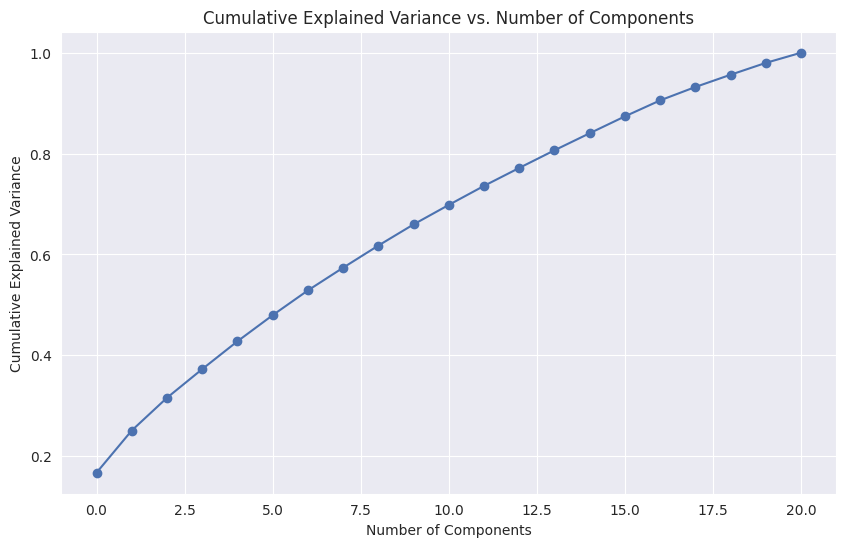

In [22]:
pca = PCA()
X_pca = pca.fit_transform(X_train)


explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 6))
plt.plot(cumulative_explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.show()

*In the plot, you'll see how much variance is explained by each additional component. You can choose the number of components that retain the desired percentage of total variance. For example, if you want to retain 95% of the variance, find the point on the x-axis where the cumulative explained variance is close to 0.95.*

In [23]:
# base on the graph
best_n_components = 19

In [24]:
pca = PCA(n_components=best_n_components)
X_train_pca = pca.fit_transform(X_train)

# Create a list of column names for the factors DataFrame
column_names = ['PC' + str(i + 1) for i in range(best_n_components)]

# Create the DataFrame
factors_Df = pd.DataFrame(data=X_train_pca, columns=column_names)
factors_Df.index = X_train.index

In [25]:
factors_Df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19
31141,-1.424375,-1.706194,-0.070750,0.948972,1.057816,-0.156239,-0.136967,-0.009579,-0.543891,-1.463526,-0.584262,0.591288,-0.858363,0.162455,0.056828,0.035339,-0.731117,0.587455,-0.283534
98230,-1.131433,0.152120,-0.923321,-1.209330,0.119150,0.588651,-0.381264,0.198649,-0.610796,0.508191,0.254762,-0.244418,0.432108,-0.186982,-1.106315,-0.637867,-0.116146,0.316166,-1.059931
89662,-0.344711,-1.910812,0.006317,0.634734,-0.266329,0.872613,0.320113,-0.126216,0.160816,-0.812904,0.007948,-0.884430,-1.086788,-0.080116,-0.256529,-0.941961,0.182827,0.150705,-0.029923
208255,-2.177016,-0.489584,0.132163,-0.423799,0.432474,1.019215,-0.201040,-0.305124,-0.051949,-0.374965,-0.093407,-0.147302,-0.653250,-0.689843,0.410996,-0.427353,-1.131780,0.497696,0.830683
233415,0.575989,-0.982303,1.365827,0.640852,-1.340008,-0.412966,0.197498,0.164204,0.210449,-0.482539,-0.003381,-0.566828,-0.212955,-0.094822,-0.713814,-0.155637,-1.732125,1.083347,-0.224631


In [26]:
print(pca.explained_variance_ratio_)
print()
print(pca.explained_variance_ratio_.cumsum())
print()
print(pca.explained_variance_ratio_.sum())

[0.16701867 0.08368533 0.06488453 0.05684932 0.05518995 0.05176251
 0.04915121 0.04505708 0.04388373 0.04199016 0.03867359 0.0377215
 0.03560894 0.03499269 0.0338501  0.03342829 0.03172763 0.02654474
 0.02432767]

[0.16701867 0.250704   0.31558853 0.37243784 0.42762779 0.47939031
 0.52854151 0.57359859 0.61748232 0.65947248 0.69814607 0.73586757
 0.77147651 0.8064692  0.8403193  0.87374759 0.90547522 0.93201996
 0.95634763]

0.9563476299767718


**Visualization of the explained variance**

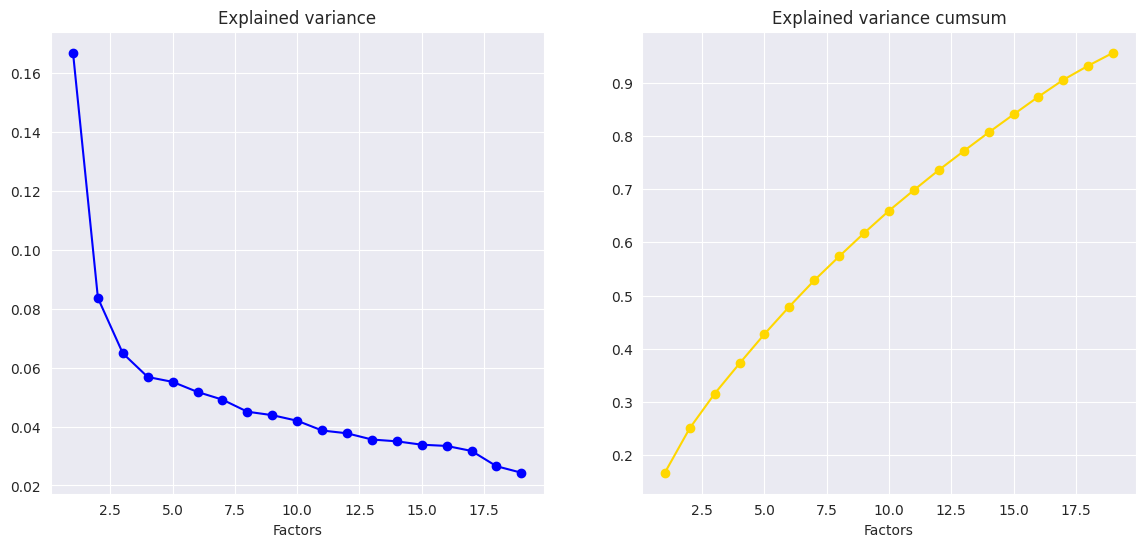

In [27]:
fig = plt.figure(figsize=(14,6))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.plot(np.arange(1,20),pca.explained_variance_ratio_,color='b',marker='o')
ax2.plot(np.arange(1,20),np.cumsum(pca.explained_variance_ratio_),color='gold',marker='o')

ax1.set_xlabel('Factors')
ax1.set_title('Explained variance')
ax2.set_xlabel('Factors')
ax2.set_title('Explained variance cumsum')

plt.show()

### **Linear Discriminant Analysis (LDA)**

In [28]:
# Initialize LDA and transform X_train
lda = LinearDiscriminantAnalysis(n_components=None)
lda.fit(X_train, y_train)
X_train_lda = lda.transform(X_train)

# Initialize LDA and transform X_test
X_test_lda = lda.transform(X_test)

### **Predictive analysis**

#### **Principal Component Analysis (PCA)**

In [29]:
X_test_pca = pca.transform(X_test)

Principal Component Analysis (PCA) 

--- Logistic Regression ---
Accuracy: 0.85
Precision: 0.82
Recall: 0.85
F1 Score: 0.81
ROC AUC: 0.78
Balanced Accuracy: 0.38
Confusion Matrix:
[[41826     0   969]
 [  871     0    73]
 [ 5785     0  1212]]




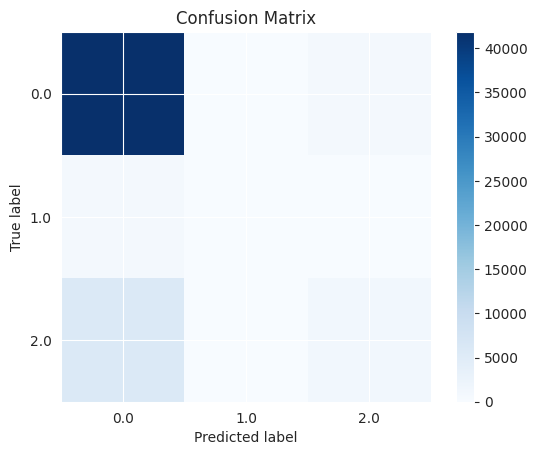

--- Random Forest ---
Accuracy: 0.84
Precision: 0.79
Recall: 0.84
F1 Score: 0.81
ROC AUC: 0.74
Balanced Accuracy: 0.38
Confusion Matrix:
[[41438    29  1328]
 [  847     0    97]
 [ 5740     8  1249]]




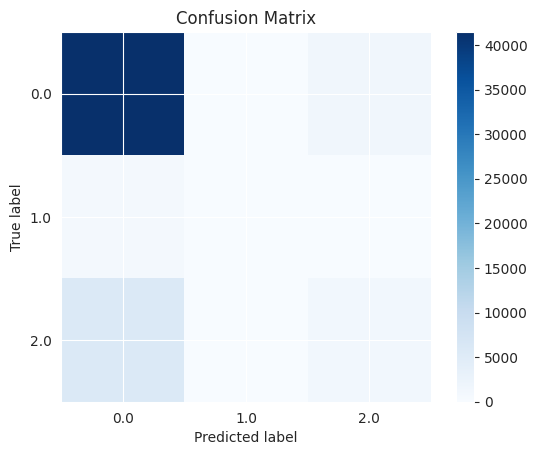

--- K-Nearest Neighbors ---
Accuracy: 0.83
Precision: 0.78
Recall: 0.83
F1 Score: 0.80
ROC AUC: 0.66
Balanced Accuracy: 0.39
Confusion Matrix:
[[40668    26  2101]
 [  821     2   121]
 [ 5546    16  1435]]




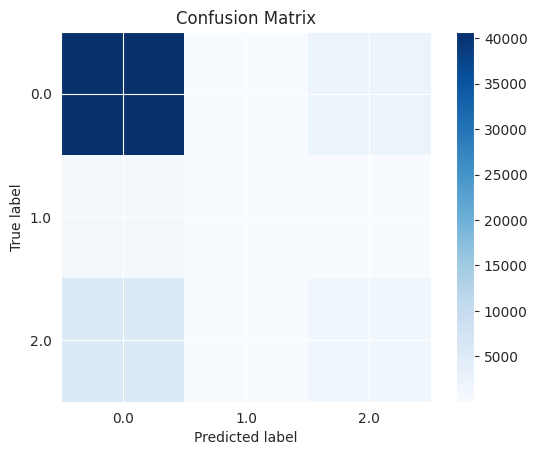

--- XGBoost ---
Accuracy: 0.85
Precision: 0.82
Recall: 0.85
F1 Score: 0.81
ROC AUC: 0.78
Balanced Accuracy: 0.38
Confusion Matrix:
[[41851     0   944]
 [  859     0    85]
 [ 5767     0  1230]]




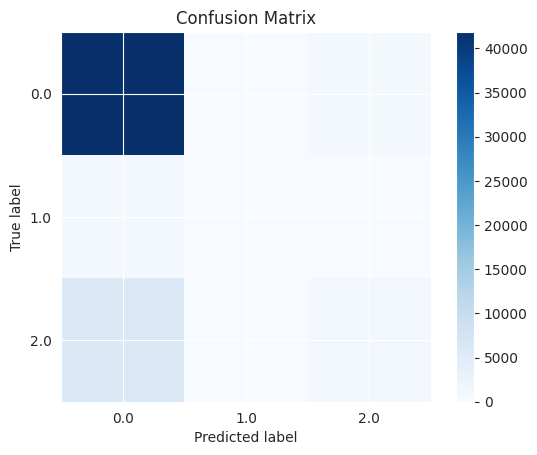

In [30]:
# Dictionary to store evaluation metrics and predictions
results = {}
pca_trained_classifiers= {}

# Loop through each classifier
for name, clf in classifiers_pca.items():
    # Train the classifier
    clf.fit(X_train_pca, y_train)

    # Store the trained classifiers
    pca_trained_classifiers[name] = clf

    # Make predictions on the test set
    y_pred = clf.predict(X_test_pca)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted", zero_division=1)
    recall = recall_score(y_test, y_pred, average="weighted", zero_division=1)
    f1 = f1_score(y_test, y_pred, average="weighted", zero_division=1)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)

    # ROC AUC calculation for binary and multiclass classification
    if len(np.unique(y_train)) == 2:
        roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test_pca)[:, 1])
    else:
        roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test_pca), multi_class='ovr')

    # Store the results in the dictionary
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC AUC": roc_auc,
        "Balanced Accuracy": balanced_accuracy,
        "Confusion Matrix": confusion,
    }

# Display the results
print("Principal Component Analysis (PCA) \n")
for name, metrics in results.items():
    print(f"--- {name} ---")
    print("Accuracy: {:.2f}".format(metrics["Accuracy"]))
    print("Precision: {:.2f}".format(metrics["Precision"]))
    print("Recall: {:.2f}".format(metrics["Recall"]))
    print("F1 Score: {:.2f}".format(metrics["F1 Score"]))
    print("ROC AUC: {:.2f}".format(metrics["ROC AUC"]))
    print("Balanced Accuracy: {:.2f}".format(metrics["Balanced Accuracy"]))
    print("Confusion Matrix:")
    print(metrics["Confusion Matrix"])
    print("\n")

    # Plot Confusion Matrix
    cm = metrics["Confusion Matrix"]
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]), yticks=np.arange(cm.shape[0]),
          xticklabels=np.unique(y_test), yticklabels=np.unique(y_test),
          xlabel='Predicted label', ylabel='True label',
          title='Confusion Matrix')
    plt.show()

#### **Linear Discriminant Analysis (LDA)**

In [31]:
# Initialize LDA and transform X_test
X_test_lda = lda.transform(X_test)

Linear Discriminant Analysis (LDA) 

--- Logistic Regression ---
Accuracy: 0.85
Precision: 0.82
Recall: 0.85
F1 Score: 0.81
ROC AUC: 0.78
Balanced Accuracy: 0.39
Confusion Matrix:
[[41698     0  1097]
 [  865     0    79]
 [ 5692     0  1305]]




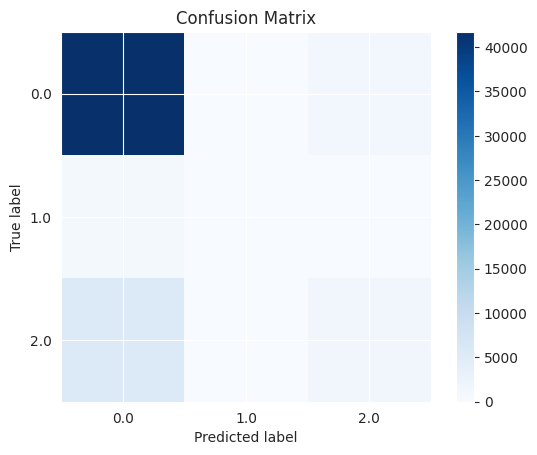

--- Random Forest ---
Accuracy: 0.83
Precision: 0.78
Recall: 0.83
F1 Score: 0.80
ROC AUC: 0.70
Balanced Accuracy: 0.39
Confusion Matrix:
[[40384    71  2340]
 [  795     4   145]
 [ 5411    33  1553]]




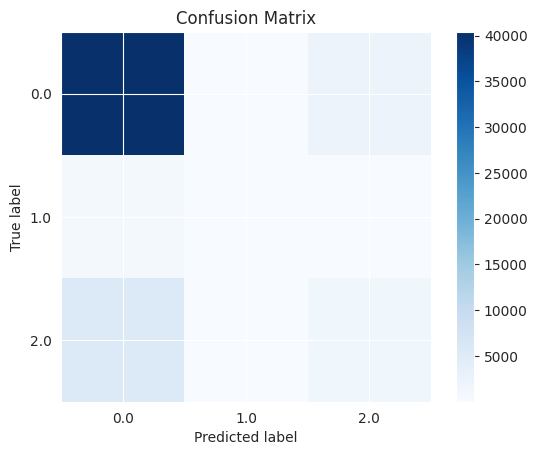

--- K-Nearest Neighbors ---
Accuracy: 0.83
Precision: 0.78
Recall: 0.83
F1 Score: 0.80
ROC AUC: 0.65
Balanced Accuracy: 0.39
Confusion Matrix:
[[40662    24  2109]
 [  811     1   132]
 [ 5516    18  1463]]




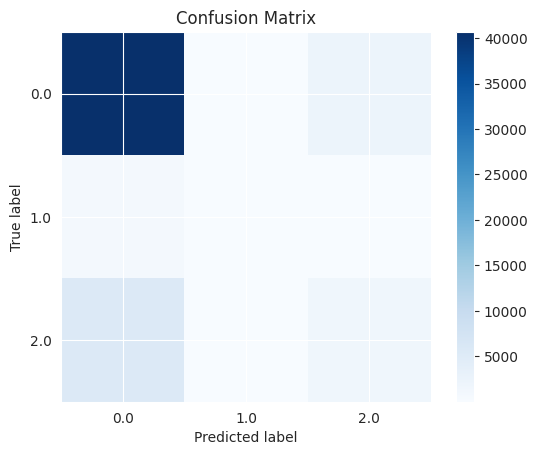

--- XGBoost ---
Accuracy: 0.85
Precision: 0.82
Recall: 0.85
F1 Score: 0.80
ROC AUC: 0.78
Balanced Accuracy: 0.37
Confusion Matrix:
[[42032     0   763]
 [  885     0    59]
 [ 6033     0   964]]




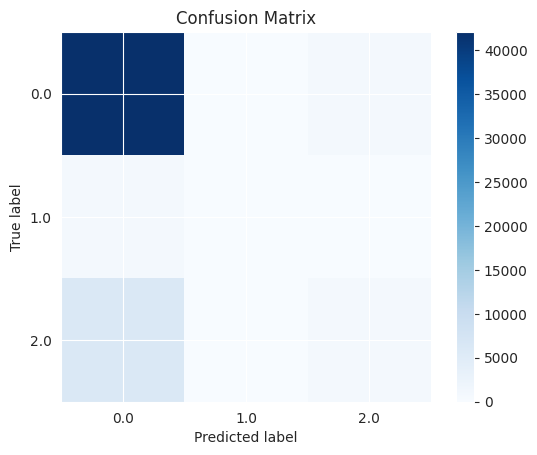

In [32]:
# Dictionary to store evaluation metrics and predictions
results = {}
lda_trained_classifiers= {}

# Loop through each classifier
for name, clf in classifiers_lda.items():

    # Train the classifier
    clf.fit(X_train_lda, y_train)

    # Store the trained classifiers
    lda_trained_classifiers[name] = clf

    # Make predictions on the test set
    y_pred = clf.predict(X_test_lda)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted", zero_division=1)
    recall = recall_score(y_test, y_pred, average="weighted", zero_division=1)
    f1 = f1_score(y_test, y_pred, average="weighted", zero_division=1)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)

    # ROC AUC calculation for binary and multiclass classification
    if len(np.unique(y_train)) == 2:
        roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test_lda)[:, 1])
    else:
        roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test_lda), multi_class='ovr')

    # Store the results in the dictionary
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC AUC": roc_auc,
        "Balanced Accuracy": balanced_accuracy,
        "Confusion Matrix": confusion,
    }


# Display the results
print("Linear Discriminant Analysis (LDA) \n")
for name, metrics in results.items():
    print(f"--- {name} ---")
    print("Accuracy: {:.2f}".format(metrics["Accuracy"]))
    print("Precision: {:.2f}".format(metrics["Precision"]))
    print("Recall: {:.2f}".format(metrics["Recall"]))
    print("F1 Score: {:.2f}".format(metrics["F1 Score"]))
    print("ROC AUC: {:.2f}".format(metrics["ROC AUC"]))
    print("Balanced Accuracy: {:.2f}".format(metrics["Balanced Accuracy"]))
    print("Confusion Matrix:")
    print(metrics["Confusion Matrix"])
    print("\n")

    # Plot Confusion Matrix
    cm = metrics["Confusion Matrix"]
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]), yticks=np.arange(cm.shape[0]),
          xticklabels=np.unique(y_test), yticklabels=np.unique(y_test),
          xlabel='Predicted label', ylabel='True label',
          title='Confusion Matrix')
    plt.show()

### **Ensemble of Classifiers with Dimensionality Reduction**

#### **1. Choose One Dimensionality Reduction Technique**

##### **2.1 PCA**

###### **Bagging**

In [33]:
# Create a list of base classifiers
base_classifiers = [pca_trained_classifiers['Logistic Regression'], pca_trained_classifiers['Random Forest'], pca_trained_classifiers['K-Nearest Neighbors'] , pca_trained_classifiers['XGBoost'] ]

In [34]:
# Create a list of bagging classifiers, each using a different base classifier
bagging_classifiers = []
n_estimators = 3  # Number of base estimators

for classifier in base_classifiers:
    bagging_model = BaggingClassifier(estimator=classifier, n_estimators=n_estimators)
    bagging_classifiers.append(bagging_model)

# Train the ensemble.
for bagging_model in bagging_classifiers:
    bagging_model.fit(X_train_pca, y_train)

--- LDA Bagging Ensemble with Dimensionality Reduction ---
Accuracy: 0.85
Precision: 0.82
Recall: 0.85
F1 Score: 0.81
Balanced Accuracy: 0.38
Confusion Matrix:
[[41904     0   891]
 [  866     0    78]
 [ 5830     0  1167]]




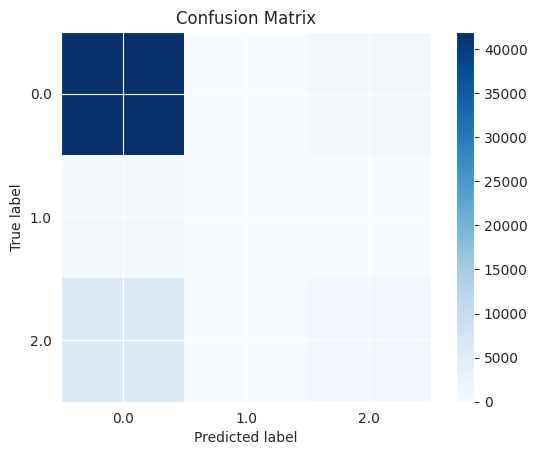

In [35]:
# Predict using the ensemble classifier
begging_pred  = bagging_model.predict(X_test_pca)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, begging_pred )
precision = precision_score(y_test, begging_pred , average="weighted", zero_division=1)
recall = recall_score(y_test, begging_pred , average="weighted", zero_division=1)
f1 = f1_score(y_test, begging_pred , average="weighted", zero_division=1)
balanced_accuracy = balanced_accuracy_score(y_test, begging_pred )
confusion = confusion_matrix(y_test, begging_pred )


print(f"--- LDA Bagging Ensemble with Dimensionality Reduction ---")
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))
print("Balanced Accuracy: {:.2f}".format(balanced_accuracy))
print("Confusion Matrix:")
print(confusion)
print("\n")

# Plot Confusion Matrix
cm = confusion
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]), yticks=np.arange(cm.shape[0]),
      xticklabels=np.unique(y_test), yticklabels=np.unique(y_test),
      xlabel='Predicted label', ylabel='True label',
      title='Confusion Matrix')
plt.show()

###### **Boosting**

In [36]:
base_classifiers = [pca_trained_classifiers['Logistic Regression'], pca_trained_classifiers['Random Forest'], pca_trained_classifiers['XGBoost'] ]

In [37]:
# Create a list of boosting classifiers, each using a different base classifier
boosting_classifiers = []
n_estimators = 3  # Number of boosting iterations

for classifier in base_classifiers:
    boosting_model = AdaBoostClassifier(estimator=classifier, n_estimators=n_estimators)
    boosting_classifiers.append(boosting_model)

# Train the ensemble
for boosting_model in boosting_classifiers:
    boosting_model.fit(X_train_pca, y_train)

--- LDA Boosting Ensemble with Dimensionality Reduction ---
Accuracy: 0.84
Precision: 0.87
Recall: 0.84
F1 Score: 0.77
Balanced Accuracy: 0.33
Confusion Matrix:
[[42795     0     0]
 [  944     0     0]
 [ 6997     0     0]]




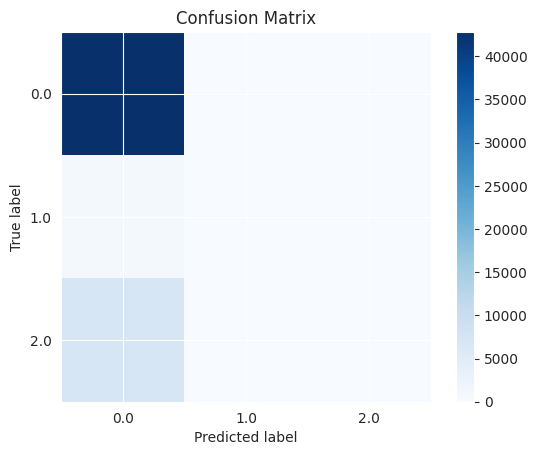

In [38]:
# Predict using the ensemble classifier
boosting_pred  = boosting_model.predict(X_test_pca)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, boosting_pred )
precision = precision_score(y_test, boosting_pred , average="weighted", zero_division=1)
recall = recall_score(y_test, boosting_pred , average="weighted", zero_division=1)
f1 = f1_score(y_test, boosting_pred , average="weighted", zero_division=1)
balanced_accuracy = balanced_accuracy_score(y_test, boosting_pred )
confusion = confusion_matrix(y_test, boosting_pred )


print(f"--- LDA Boosting Ensemble with Dimensionality Reduction ---")
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))
print("Balanced Accuracy: {:.2f}".format(balanced_accuracy))
print("Confusion Matrix:")
print(confusion)
print("\n")

# Plot Confusion Matrix
cm = confusion
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]), yticks=np.arange(cm.shape[0]),
      xticklabels=np.unique(y_test), yticklabels=np.unique(y_test),
      xlabel='Predicted label', ylabel='True label',
      title='Confusion Matrix')
plt.show()

##### **2.2 LDA**

In [39]:
# Create a list of base classifiers
base_classifiers = [lda_trained_classifiers['Logistic Regression'], lda_trained_classifiers['Random Forest'], lda_trained_classifiers['K-Nearest Neighbors'] , lda_trained_classifiers['XGBoost'] ]

###### **Bagging**

In [40]:
# Create a list of bagging classifiers, each using a different base classifier
bagging_classifiers = []
n_estimators = 4  # Number of base estimators

for classifier in base_classifiers:
    bagging_model = BaggingClassifier(estimator=classifier, n_estimators=n_estimators)
    bagging_classifiers.append(bagging_model)

# Train the ensemble
for bagging_model in bagging_classifiers:
    bagging_model.fit(X_train_lda, y_train)

--- LDA Bagging Ensemble with Dimensionality Reduction ---
Accuracy: 0.85
Precision: 0.82
Recall: 0.85
F1 Score: 0.80
Balanced Accuracy: 0.37
Confusion Matrix:
[[42074     0   721]
 [  890     0    54]
 [ 6061     0   936]]




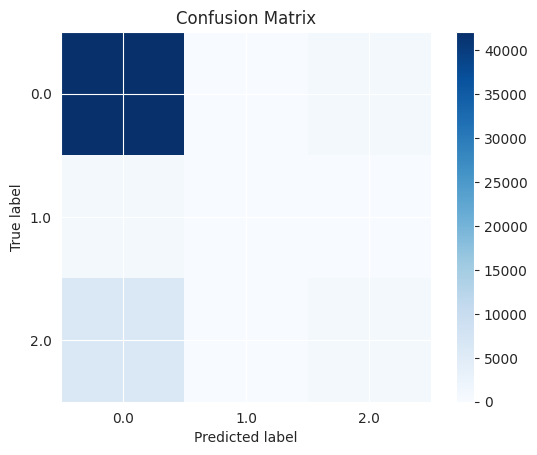

In [41]:
# Predict using the ensemble classifier
begging_pred  = bagging_model.predict(X_test_lda)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, begging_pred )
precision = precision_score(y_test, begging_pred , average="weighted", zero_division=1)
recall = recall_score(y_test, begging_pred , average="weighted", zero_division=1)
f1 = f1_score(y_test, begging_pred , average="weighted", zero_division=1)
balanced_accuracy = balanced_accuracy_score(y_test, begging_pred )
confusion = confusion_matrix(y_test, begging_pred )

print(f"--- LDA Bagging Ensemble with Dimensionality Reduction ---")
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))
print("Balanced Accuracy: {:.2f}".format(balanced_accuracy))
print("Confusion Matrix:")
print(confusion)
print("\n")

# Plot Confusion Matrix
cm = confusion
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]), yticks=np.arange(cm.shape[0]),
      xticklabels=np.unique(y_test), yticklabels=np.unique(y_test),
      xlabel='Predicted label', ylabel='True label',
      title='Confusion Matrix')
plt.show()

###### **Boosting**

In [42]:
base_classifiers = [lda_trained_classifiers['Logistic Regression'], lda_trained_classifiers['Random Forest'], lda_trained_classifiers['XGBoost'] ]

In [43]:
# Create a list of boosting classifiers, each using a different base classifier
boosting_classifiers = []
n_estimators = 3  # Number of boosting iterations

for classifier in base_classifiers:
    boosting_model = AdaBoostClassifier(estimator=classifier, n_estimators=n_estimators)
    boosting_classifiers.append(boosting_model)

# Train the ensemble
for boosting_model in boosting_classifiers:
    boosting_model.fit(X_train_lda, y_train)

--- LDA Boosting Ensemble with Dimensionality Reduction ---
Accuracy: 0.84
Precision: 0.87
Recall: 0.84
F1 Score: 0.77
Balanced Accuracy: 0.33
Confusion Matrix:
[[42795     0     0]
 [  944     0     0]
 [ 6997     0     0]]




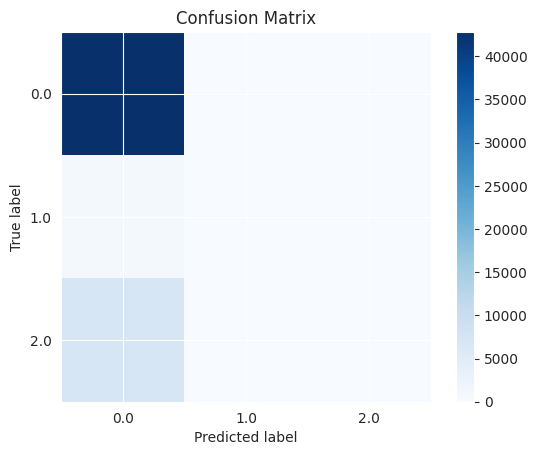

In [44]:
# Predict using the ensemble classifier
boosting_pred  = boosting_model.predict(X_test_lda)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, boosting_pred )
precision = precision_score(y_test, boosting_pred , average="weighted", zero_division=1)
recall = recall_score(y_test, boosting_pred , average="weighted", zero_division=1)
f1 = f1_score(y_test, boosting_pred , average="weighted", zero_division=1)
balanced_accuracy = balanced_accuracy_score(y_test, boosting_pred )
confusion = confusion_matrix(y_test, boosting_pred )

print(f"--- LDA Boosting Ensemble with Dimensionality Reduction ---")
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))
print("Balanced Accuracy: {:.2f}".format(balanced_accuracy))
print("Confusion Matrix:")
print(confusion)
print("\n")

# Plot Confusion Matrix
cm = confusion
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]), yticks=np.arange(cm.shape[0]),
      xticklabels=np.unique(y_test), yticklabels=np.unique(y_test),
      xlabel='Predicted label', ylabel='True label',
      title='Confusion Matrix')
plt.show()